### Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Importing Data 

In [2]:
df = pd.read_csv(r"C:\Users\ROHIT RAJAN\Customer Chrun Analysis.txt")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2191,3988-RQIXO,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.30,91.3,Yes
5415,1310-QRITU,Female,0,No,No,18,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.30,913.3,No
6502,6103-QCKFX,Female,0,Yes,Yes,44,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),56.25,2419.55,No
4017,9473-CBZOP,Female,0,No,No,28,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,59.00,1654.45,No
4705,5760-FXFVO,Male,0,No,No,6,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,494.95,No


### Checking Shape of data

In [5]:
df.shape

(7043, 21)

### Checking types of data

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see we are not having any null value 

In [9]:
df.duplicated().sum()

0

There is no duplicate value in the data

#### Checking any space values filled in the columns

In [10]:
df.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data is gaving 11 value which are filled with space character.

In [11]:
df.replace(to_replace=" ", value=np.nan, inplace= True)


### Dropping unwanted data

In [12]:
df =df.dropna()

In [13]:
#Removing customer IDs from the data set the columns not used in the predictive model.
df.drop('customerID', axis=1, inplace= True)

In [14]:
df['TotalCharges']=df.TotalCharges.astype(float)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


##### We can see a strong correlation of tenure, monthlycharges with TotalCharges.

### Data analysis and Visualization

Univariate Analysis
Here We will analyse the distribution of our data columns.
before analysing lets divide dataset in categorical and numerical columns.

In [17]:
all_feature= df.select_dtypes(include=[np.object])

Lets first analyse the churn percentage, we will analyse this using pi chart.

Text(0.5, 1.0, 'Percentage of Customer Churn ')

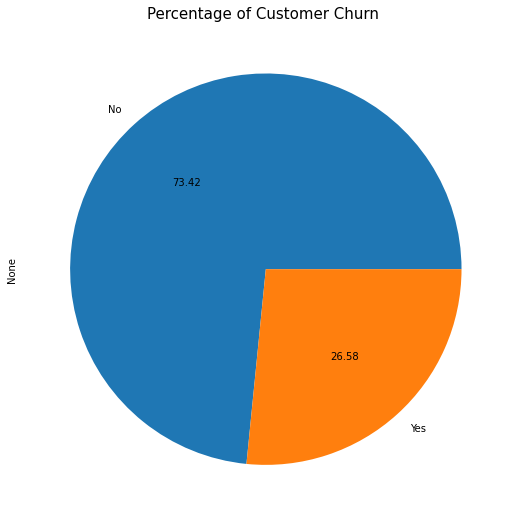

In [18]:
plt.figure(figsize=(15,9))
all_feature.groupby('Churn').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage of Customer Churn ", fontsize =15)

We can see 26.58 percentage of Customer are not satisfied with the company and dont wanted to contineu with company.

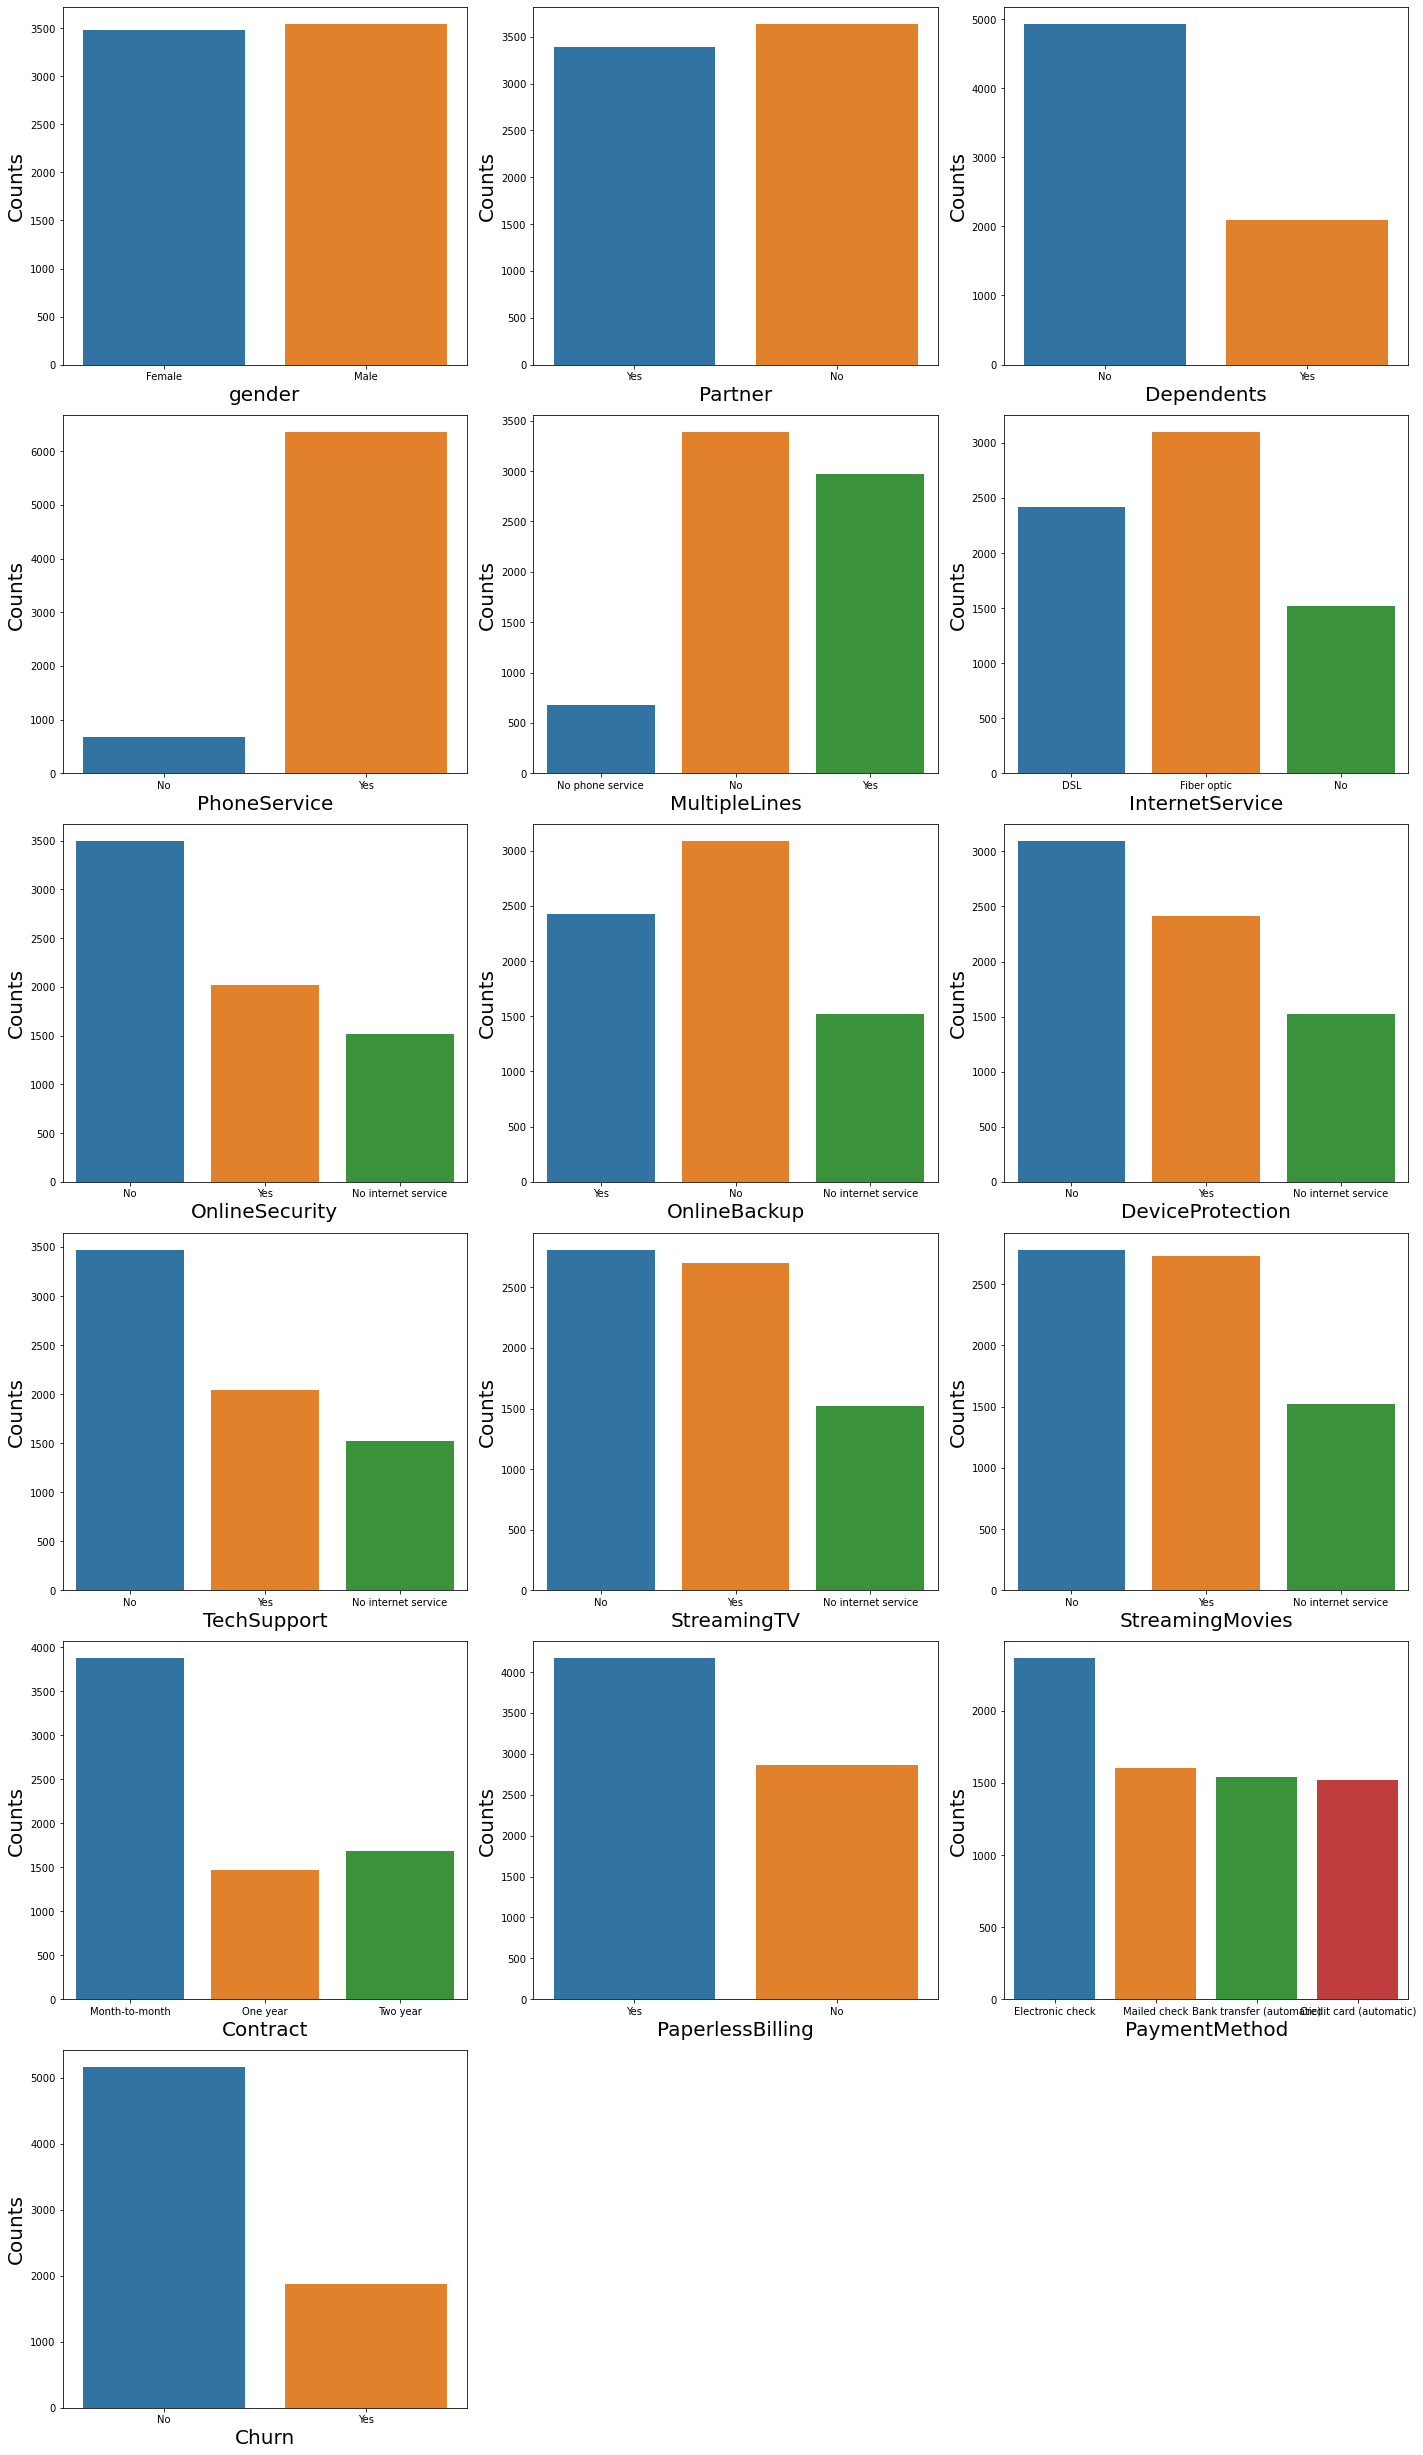

In [19]:
plt.figure(figsize=(20,45))
plotnumber= 1

for column in all_feature:
    if plotnumber<=17:
        ax= plt.subplot(8,3, plotnumber)
        
        sns.countplot(all_feature[column])
        
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Counts', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

#### 1.Gender : Number of males and Number of females are almost equal
#### 2.Partner: Count for having partner is less as compared to without partner
#### 3.Dependents : Near about 70 percent customers are not having any Dependent
#### 4.PhoneService : More than 90 percent customers have PhoneService
#### 5.MultipleLines : More than 48 percent customer not having multiple lines
#### 6.InternetService : For More than 44 percent customers internet service provider is Fiber Optics
#### 7.OnlineSecurity: 49 percent customers are not having Online Security
#### 8.OnlineBackup: More than 43 customers Not having online backup
#### 9.DeviceProtection : More than 43 customers are not having Device Protection
#### 10.TechSupport: 49 percent customers are not having any technical support
#### 11.StreamingTV : The count for Streaming TV and Not Streaming TV are almost same
#### 12.StreamingMovies : The count for Streaming Movies and Not Streaming Movies are almost same
#### 13.Contract : More than 55 percent of the cutmores are having month-to-month contract
#### 14.PaperlessBilling : we can see more than 59 percent of the customers are using PaperlessBilling
#### 15.PaperlessBilling : Most of the customers are using Electronic check
#### 16.Churn : 26 percent customer out 100 are churned.


In [20]:
no_feature= df.select_dtypes(include=[np.number])

Text(0.5, 1.0, 'Percentage SeniorCitizen')

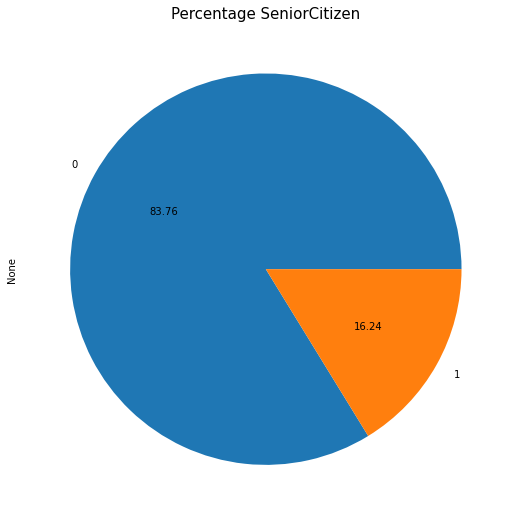

In [21]:
plt.figure(figsize=(15,9))
no_feature.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage SeniorCitizen", fontsize =15)

83.76 percent of customers are not senior Citizen

Text(0.5, 1.0, 'tenure')

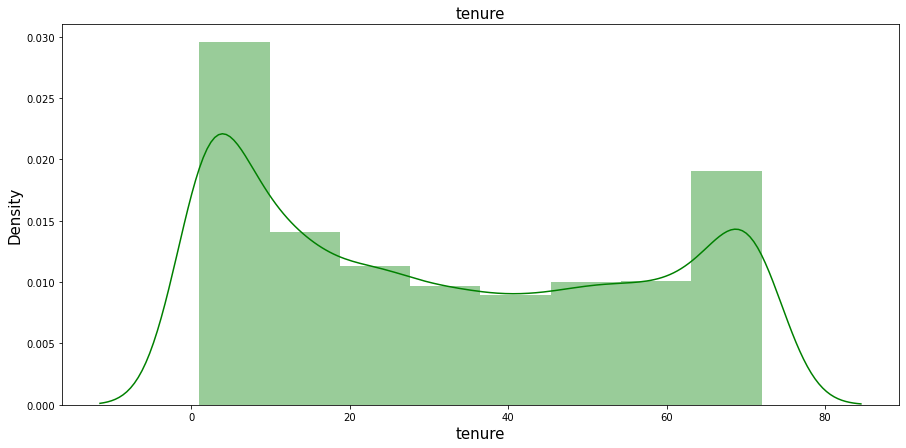

In [22]:
plt.figure(figsize=(15,7))
sns.distplot(no_feature['tenure'], bins= 8, color='g')
plt.xlabel('tenure', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('tenure', fontsize=15)

Here we can see the probablity to have tenure 0-10 and more than 60 is more.

Text(0.5, 1.0, 'MonthlyCharges')

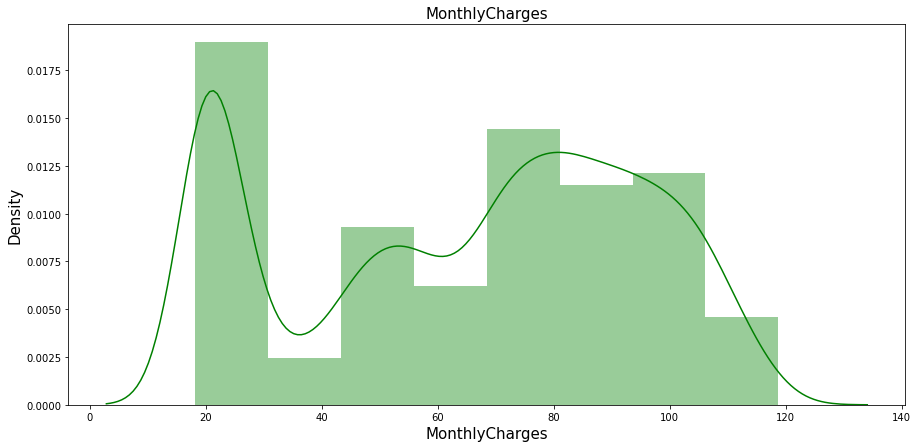

In [23]:
plt.figure(figsize=(15,7))
sns.distplot(no_feature['MonthlyCharges'], bins= 8, color='g')
plt.xlabel('MonthlyCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('MonthlyCharges', fontsize=15)

The chances of customers having monthly charge in the range of 70 to 100, is more as compare to other charges.

Text(0.5, 1.0, 'TotalCharges')

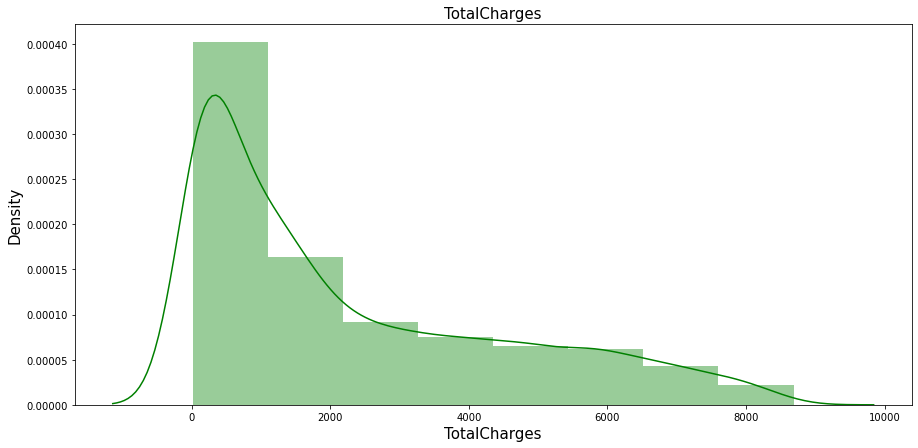

In [24]:
plt.figure(figsize=(15,7))
sns.distplot(no_feature['TotalCharges'], bins= 8, color='g')
plt.xlabel('TotalCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('TotalCharges', fontsize=15)

 The skewness present in the Total charge column, customers in the range 0 to 2000 are more.

### Bivariate analysis

Let's analyse our feature columns with respect to churn which our target variable.

In [25]:
for col in all_feature:
    print('\n%s column: '%col)
    print(all_feature[col].value_counts(),'\n'),
    print('='*30)


gender column: 
Male      3549
Female    3483
Name: gender, dtype: int64 


Partner column: 
No     3639
Yes    3393
Name: Partner, dtype: int64 


Dependents column: 
No     4933
Yes    2099
Name: Dependents, dtype: int64 


PhoneService column: 
Yes    6352
No      680
Name: PhoneService, dtype: int64 


MultipleLines column: 
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 


InternetService column: 
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 


OnlineSecurity column: 
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 


OnlineBackup column: 
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 


DeviceProtection column: 
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int

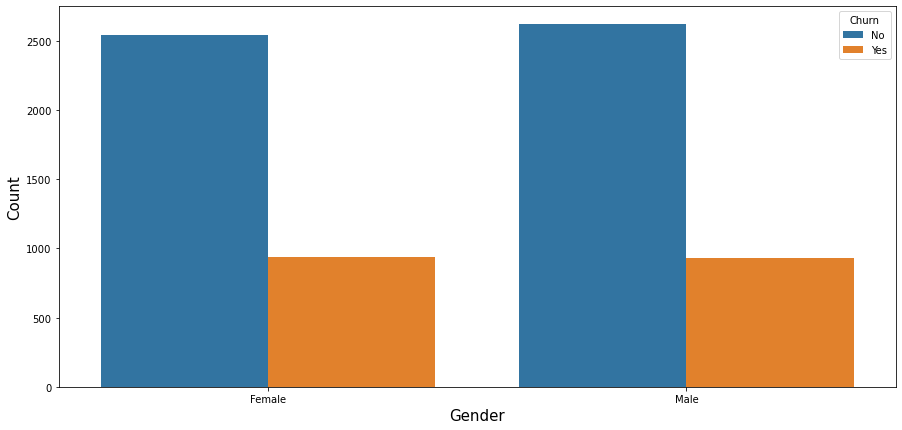

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(df['gender'], hue='Churn', data= df)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Both Male and female are equal in Churn rates.

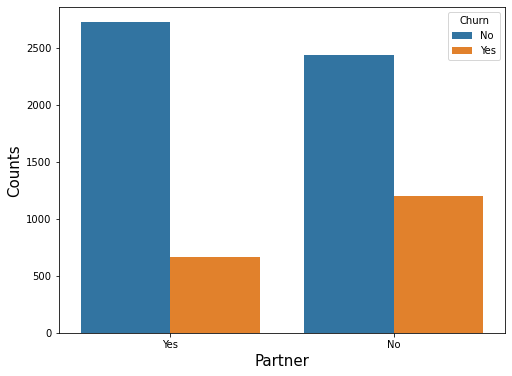

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data= all_feature, hue='Churn')
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

The customers not having partners are more likely to churn.



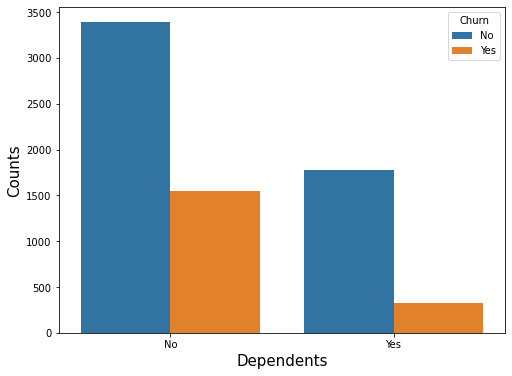

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data= all_feature, hue='Churn')
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Dependents of customer is less than compared to the customer who are dependents in Churn

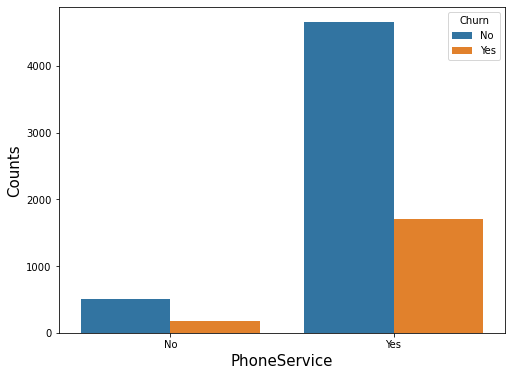

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', data= all_feature, hue='Churn')
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having phone service are more likely to churn

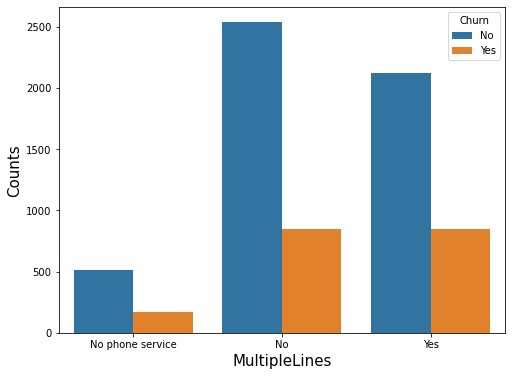

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data= all_feature, hue='Churn')
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


Customers having multiple lines are more likely to churn.

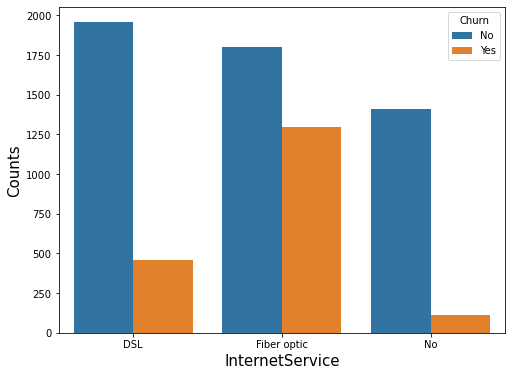

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data= all_feature, hue='Churn')
plt.xlabel('InternetService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers option for fiber optics internet service are more likely to churn.

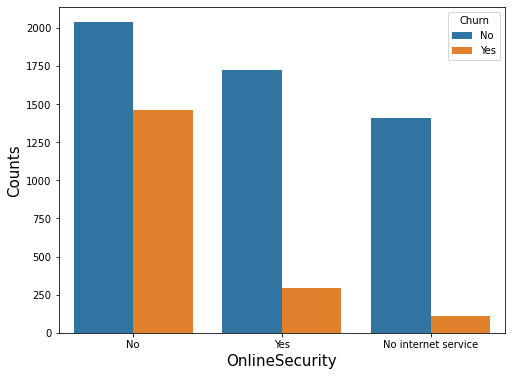

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', data= all_feature, hue='Churn')
plt.xlabel('OnlineSecurity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Online security are more likely, to churn.

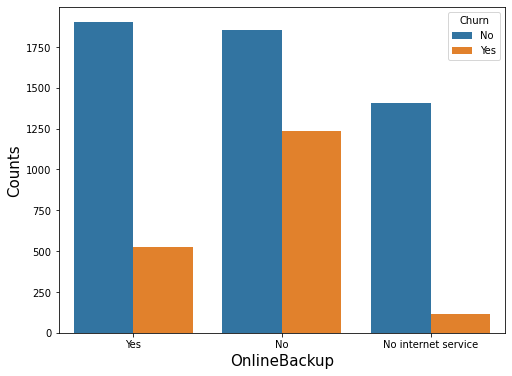

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', data= all_feature, hue='Churn')
plt.xlabel('OnlineBackup', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having online backup are more likely to churn.

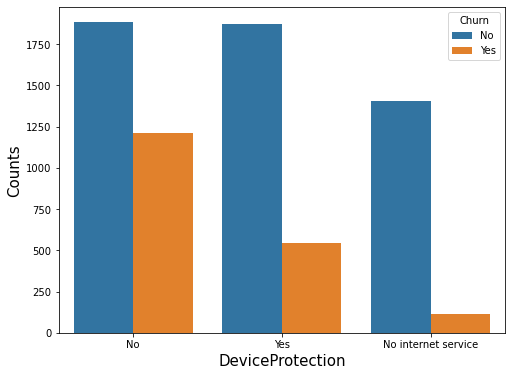

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', data= all_feature, hue='Churn')
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Device Protection are more likly to churn.

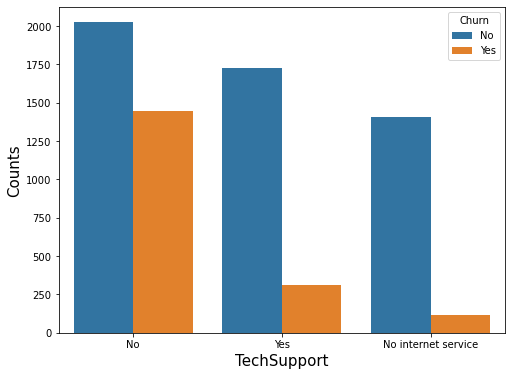

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', data= all_feature, hue='Churn')
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers without any Technical support are more likely to churn

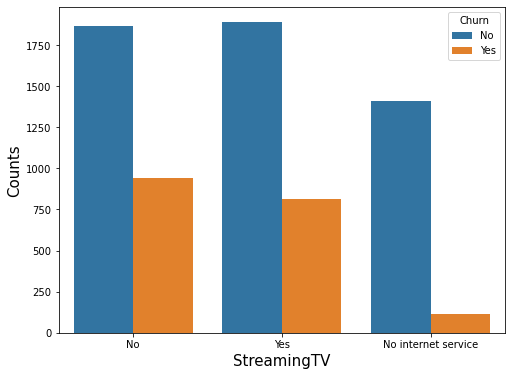

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data= all_feature, hue='Churn')
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming TV are more likely to churn.

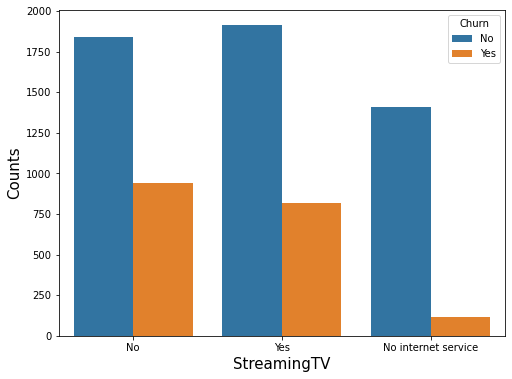

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data= all_feature, hue='Churn')
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming Movies are more likely to churn.

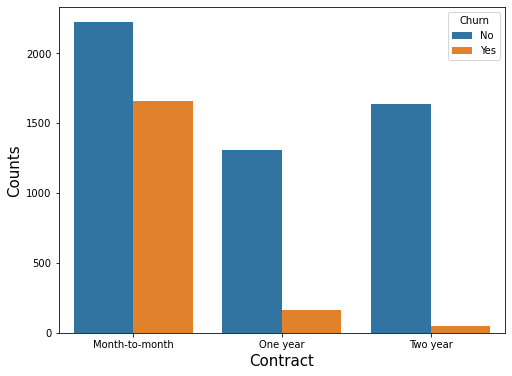

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data= all_feature, hue='Churn')
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Month to month Contract are more likely to churn.

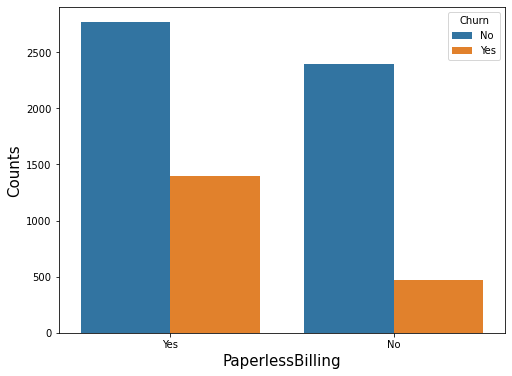

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', data= all_feature, hue='Churn')
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Paperless Billing are more likely to churn.

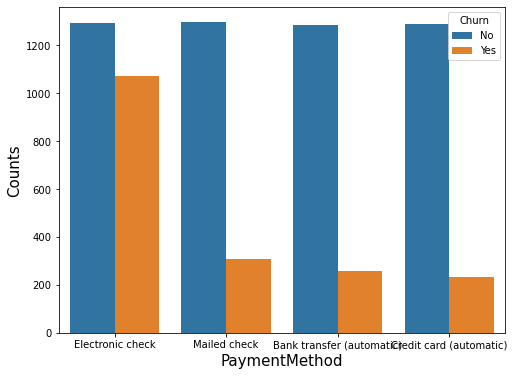

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data= all_feature, hue='Churn')
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Electronucs Payment method are more likely to churn.

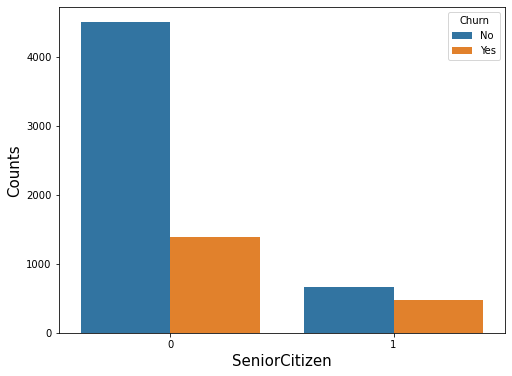

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data= df, hue='Churn')
plt.xlabel('SeniorCitizen', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

CUstomers who are not Senior Citizen are more likely to churn.

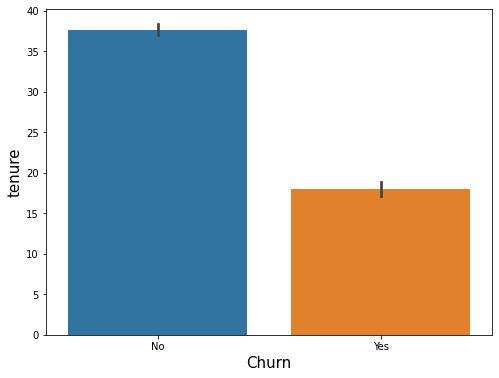

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(y='tenure', x='Churn', data= df)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

Bar Plot indiactes Higher the tenure Chance of churn is less.

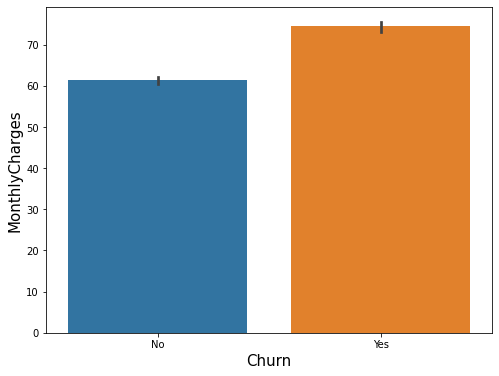

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(y='MonthlyCharges', x='Churn', data= df)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('MonthlyCharges', fontsize=15)
plt.show()

Higher the monthly charges Higher the chance to Churn.

### Multivariate Analysis

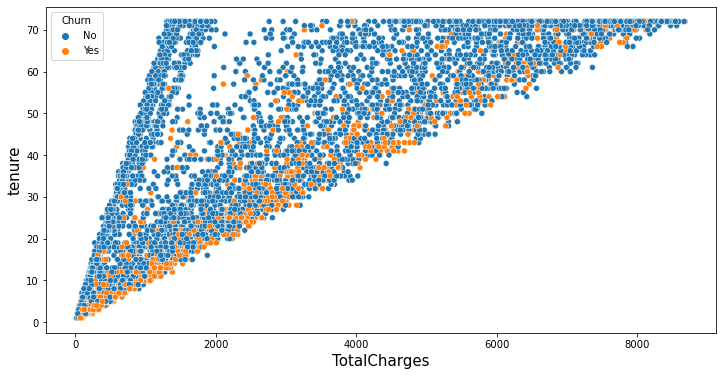

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['TotalCharges'], df['tenure'], hue='Churn', data=df)
plt.xlabel('TotalCharges', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

With increase in monthly charge and at low values of total charges churn is more likely to happen.

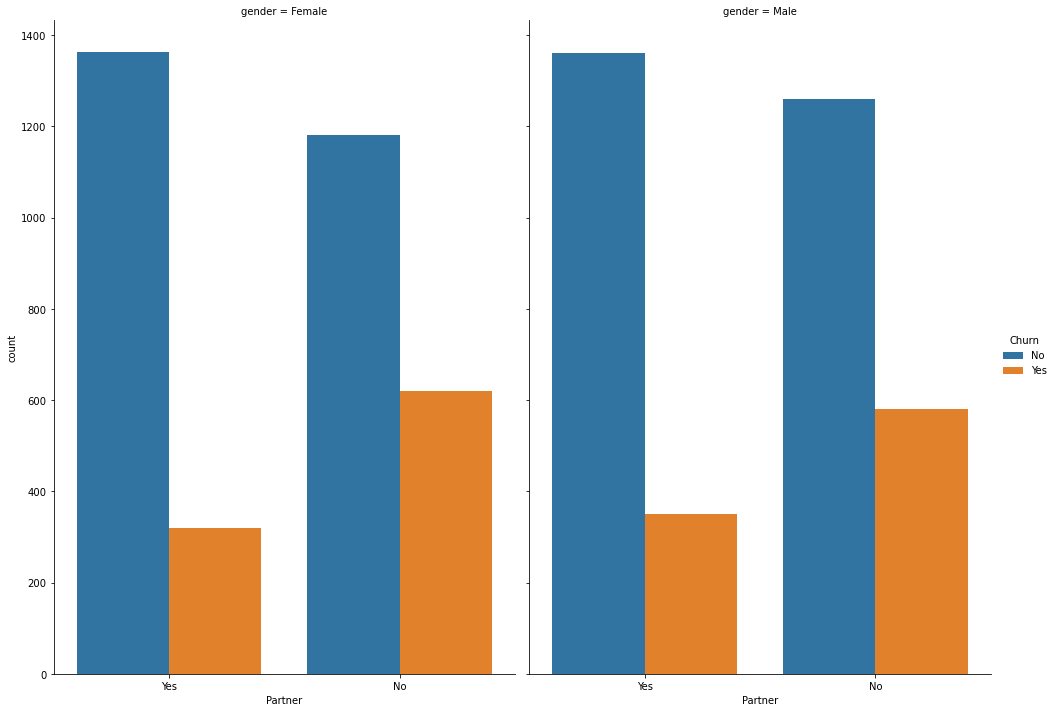

In [45]:
sns.catplot(x="Partner", hue="Churn", col="gender",data=df, kind="count",height=10, aspect=.7)

Male and female customers having no partner are more likely to churm.

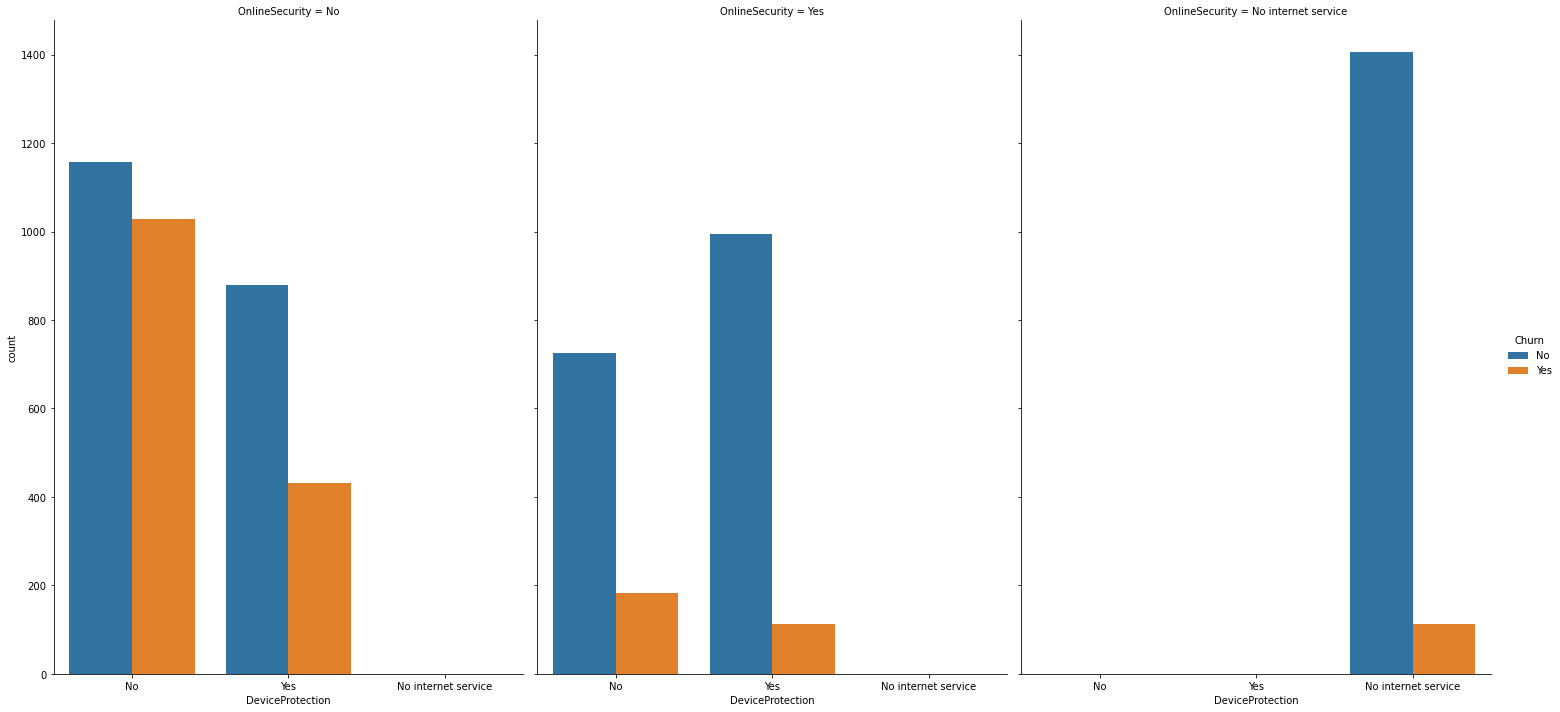

In [46]:
sns.catplot(x="DeviceProtection", hue="Churn", col="OnlineSecurity",data=df, kind="count",height=10, aspect=.7)

Customers not having Online security and device protection , are more likely to churn.

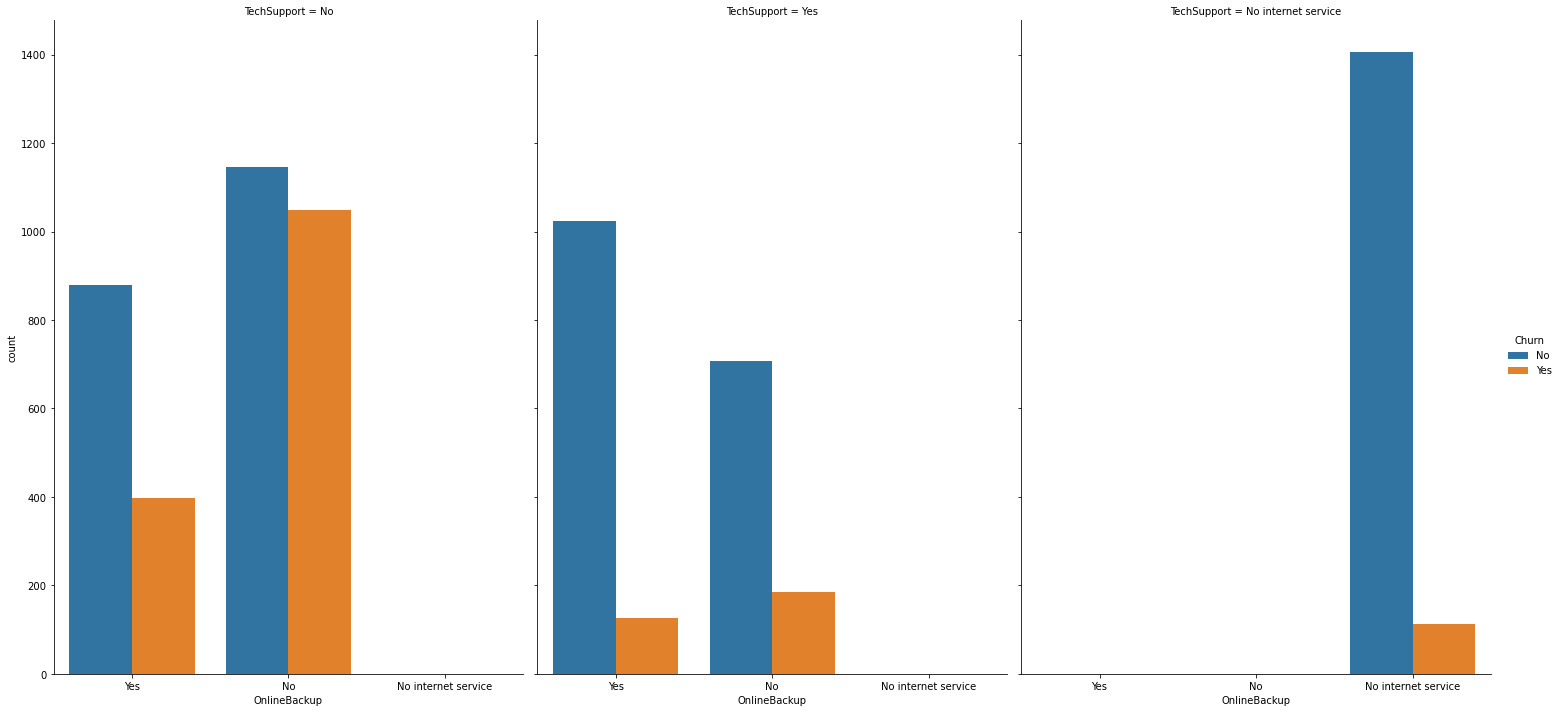

In [47]:
sns.catplot(x="OnlineBackup", hue="Churn", col="TechSupport", data=df, kind="count",height=10, aspect=.7)

Here we can see customers with no online backup and without any technical support are more likly to churn.

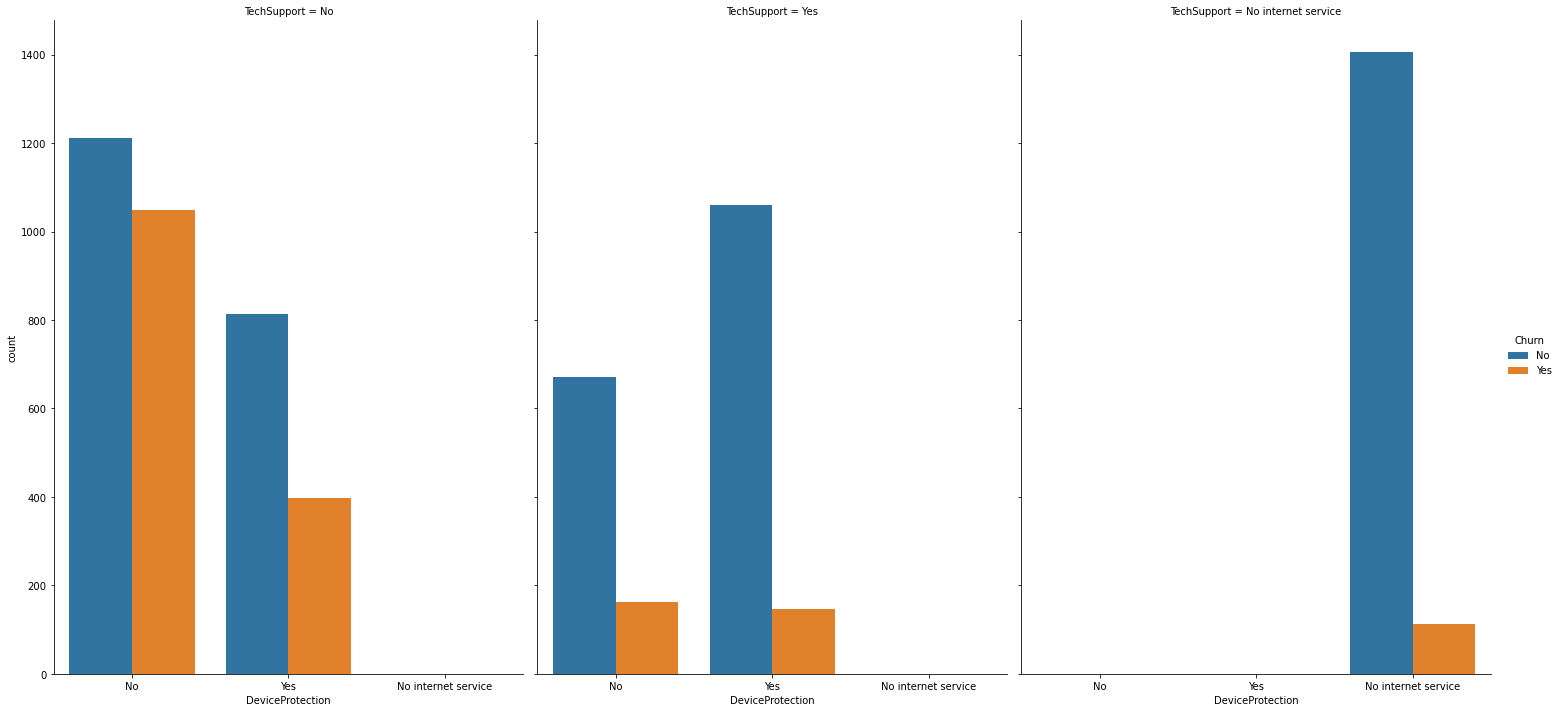

In [48]:
sns.catplot(x="DeviceProtection", hue="Churn", col="TechSupport", data=df, kind="count",height=10, aspect=.7)

Customers without any device Protection and Techsupport are more likely to churn.
Pepole with device protection and witout tech support are also more likely to churn.

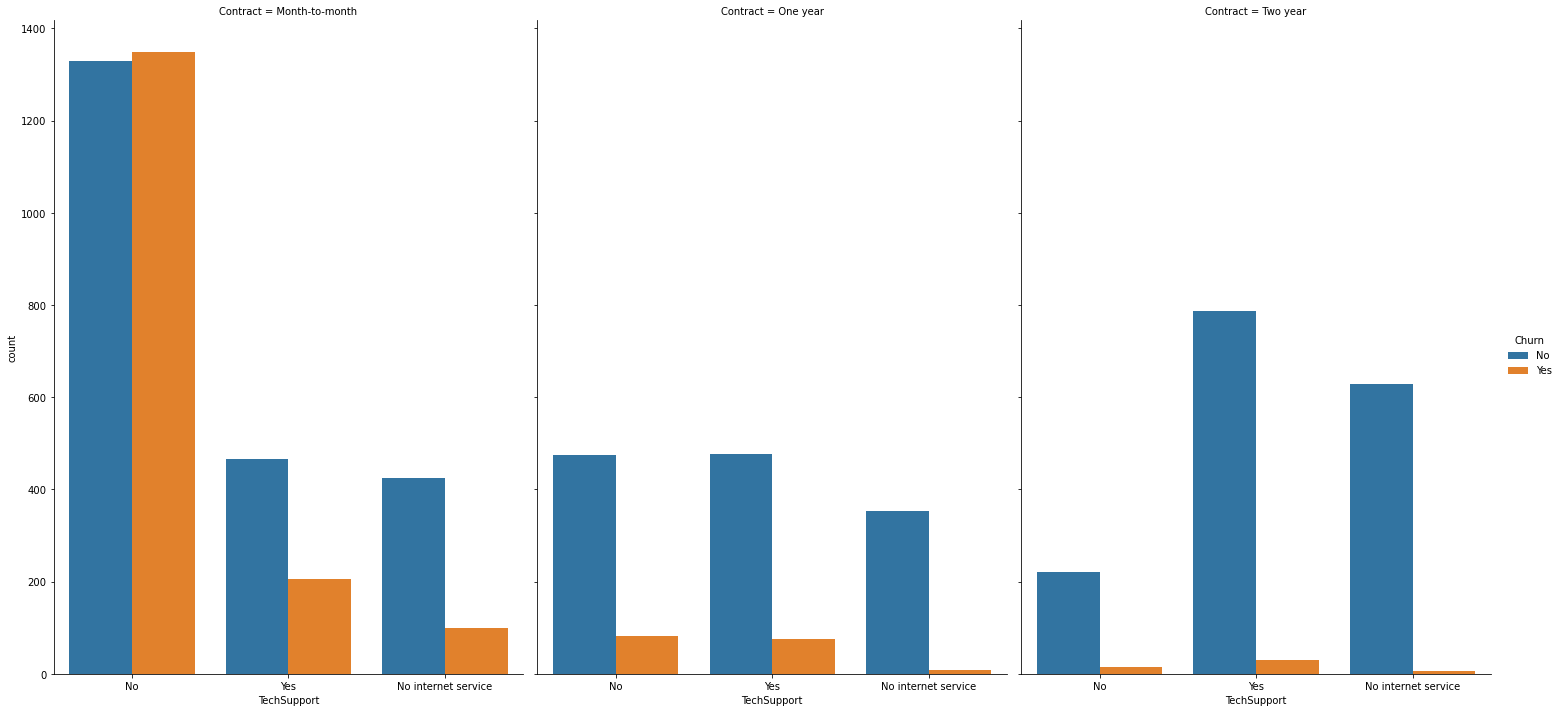

In [49]:
sns.catplot(x="TechSupport", hue="Churn", col="Contract", data=df, kind="count",height=10, aspect=.7)

Here we can see customers with monthly contract and without any technical support are more likely to Churn.
we can also say that for month to month contract, technical support is less.
Due to less technical support Customers are more likely to churn.

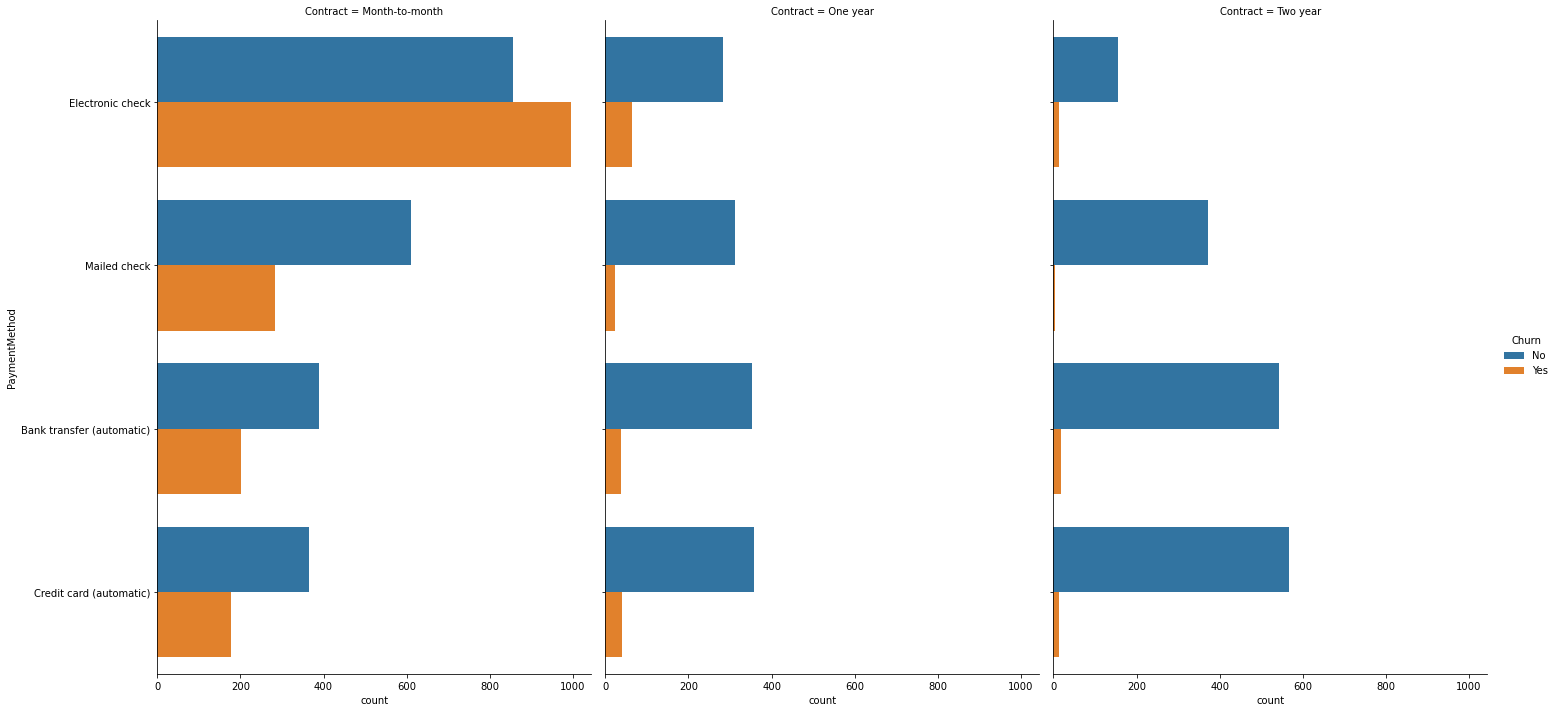

In [50]:
sns.catplot(y="PaymentMethod", hue="Churn", col="Contract", data=df, kind="count",height=10, aspect=.7)

Customers with month to month contract and using Electronics check method for payment are more likely to Churn.

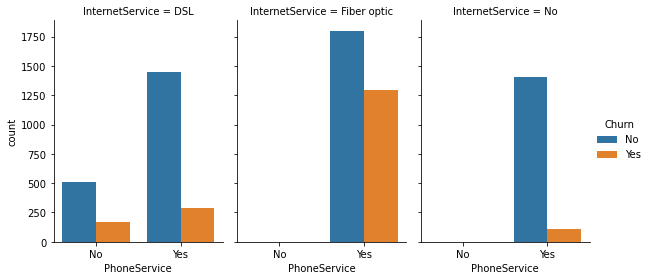

In [51]:
sns.catplot(x="PhoneService", hue="Churn", col="InternetService", data=df, kind="count",height=4, aspect=.7)

Customers with Phone service and Internet as Fiber optics are more likely to churn.

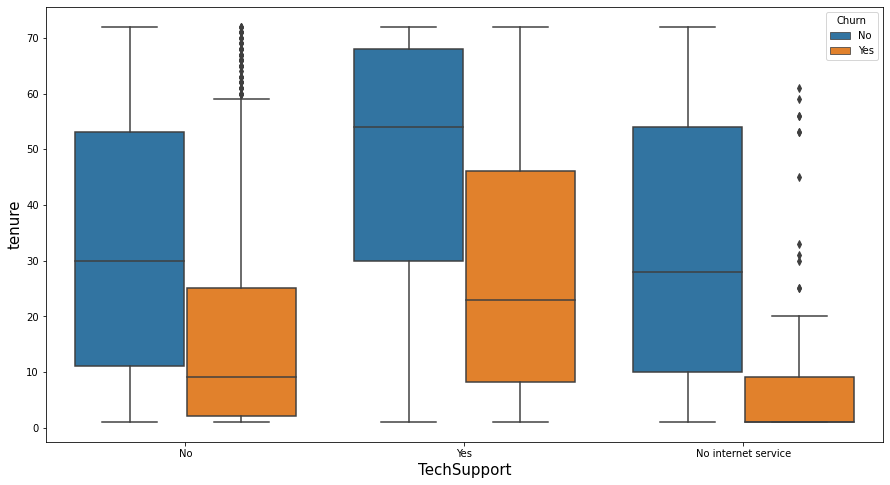

In [52]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='tenure', x='TechSupport',hue='Churn' ,data= df)
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

From Box plot we can see without any tech support the tennure is less and there is high chances of churn at less tenure.
Customers opted for techsupport are more likely to stay with the company.

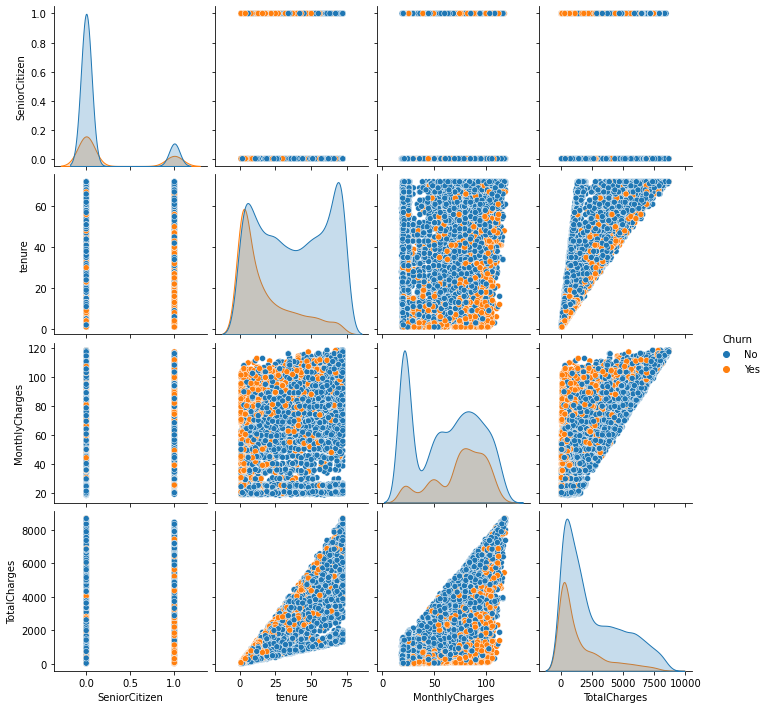

In [53]:
sns.pairplot(data=df, hue='Churn')

From the pair plot we can predict Senior Citizen are more likely to churn

### Data Preprocessing

In this step we will process our data to make it standard for our model.

In [54]:
feature=df.drop('Churn', axis=1)
target= df['Churn']

In [55]:
df_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [56]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [57]:
df_new.shape

(7032, 30)

After applyign one hot encoder, now our data changes into 7032 rows and 30 columns.

For Target column lets imort label encoder

In [58]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)

In [59]:
df_new['Churn']= Target

In [60]:
df_new.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


Now curn is added to the new dataframe.

In [61]:
df_new.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,0.254923,-0.182519,-0.182519,-0.038576,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,0.017930,-0.037529,-0.037529,0.328297,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,0.787195,-0.763191,-0.763191,0.296447,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,0.360769,-0.374878,-0.374878,0.412619,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,-0.011189,0.004745,0.004745,-0.016328,0.004745,-0.013093,0.004745,-0.000807,0.004745,-0.008507,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,0.001235,-0.000286,-0.000286,0.143346,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,-0.164101,0.138383,0.138383,0.080786,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.290183,0.171817,0.171817,-0.091676,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.290183,-0.171817,-0.171817,0.091676,-0.171817,0.052133,-0.171817,0.070076,-0.171817,0.095138,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,0.366420,-0.210794,-0.210794,0.098592,-0.210794,0.202228,-0.210794,0.201733,-0.210794,0.100421,-0.210794,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


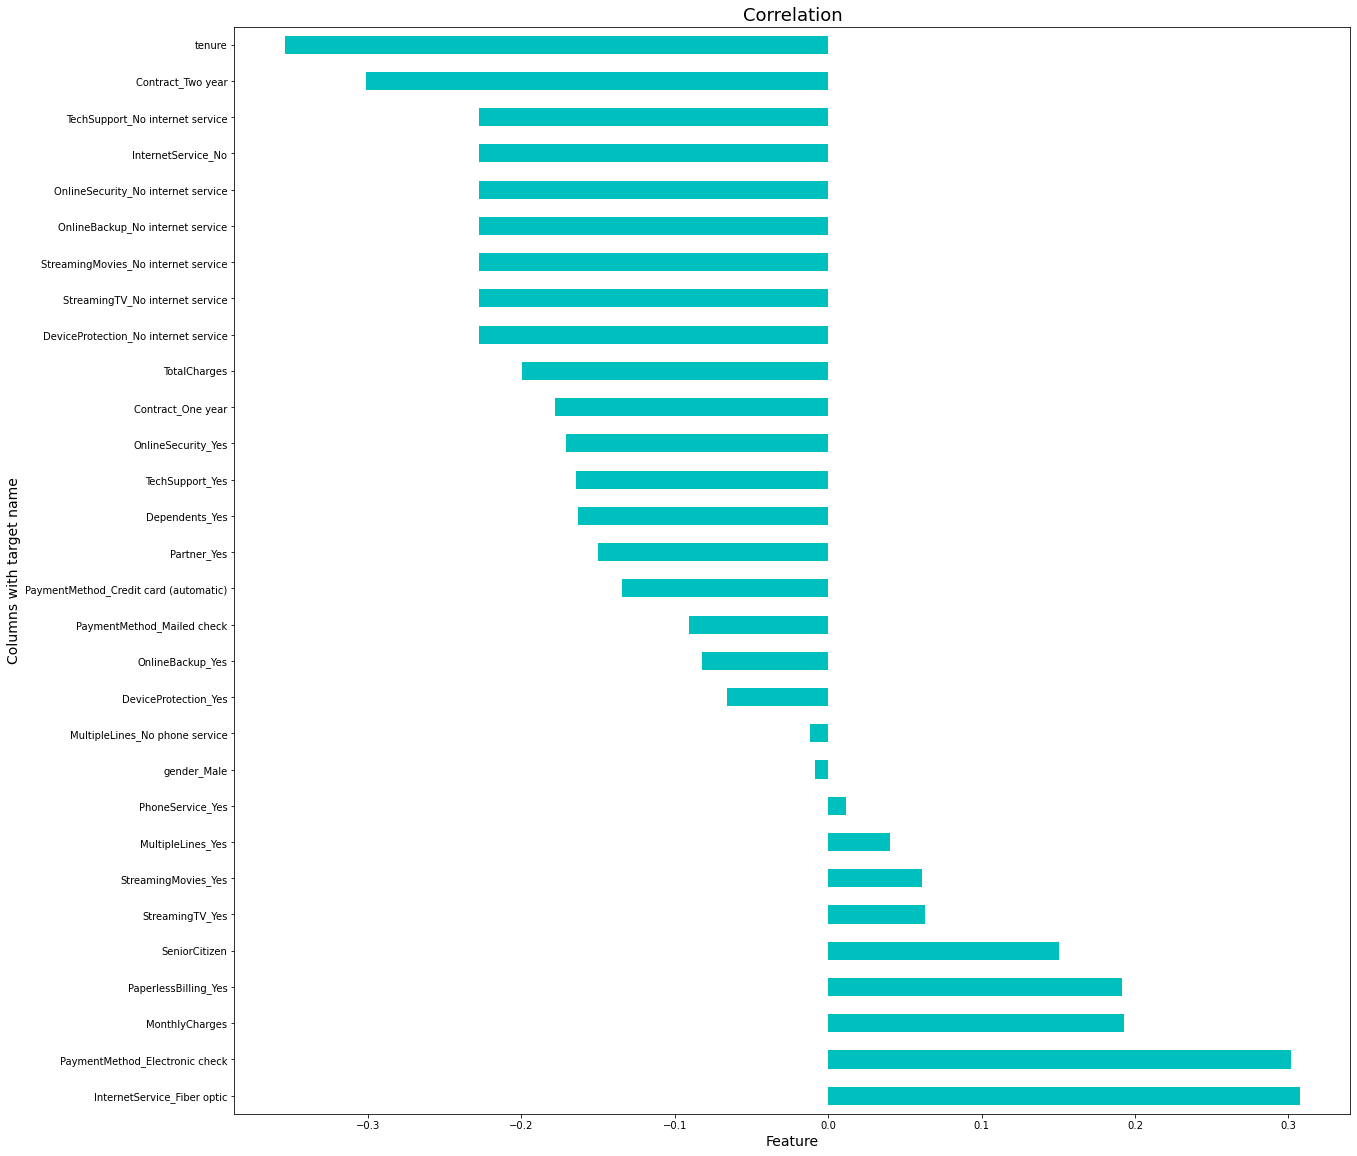

In [62]:
plt.figure(figsize=(20,20))
df_new.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

All the columns on the left of 0.0 are having negative correlation and columns on Right of 0.0 are having positive correlation

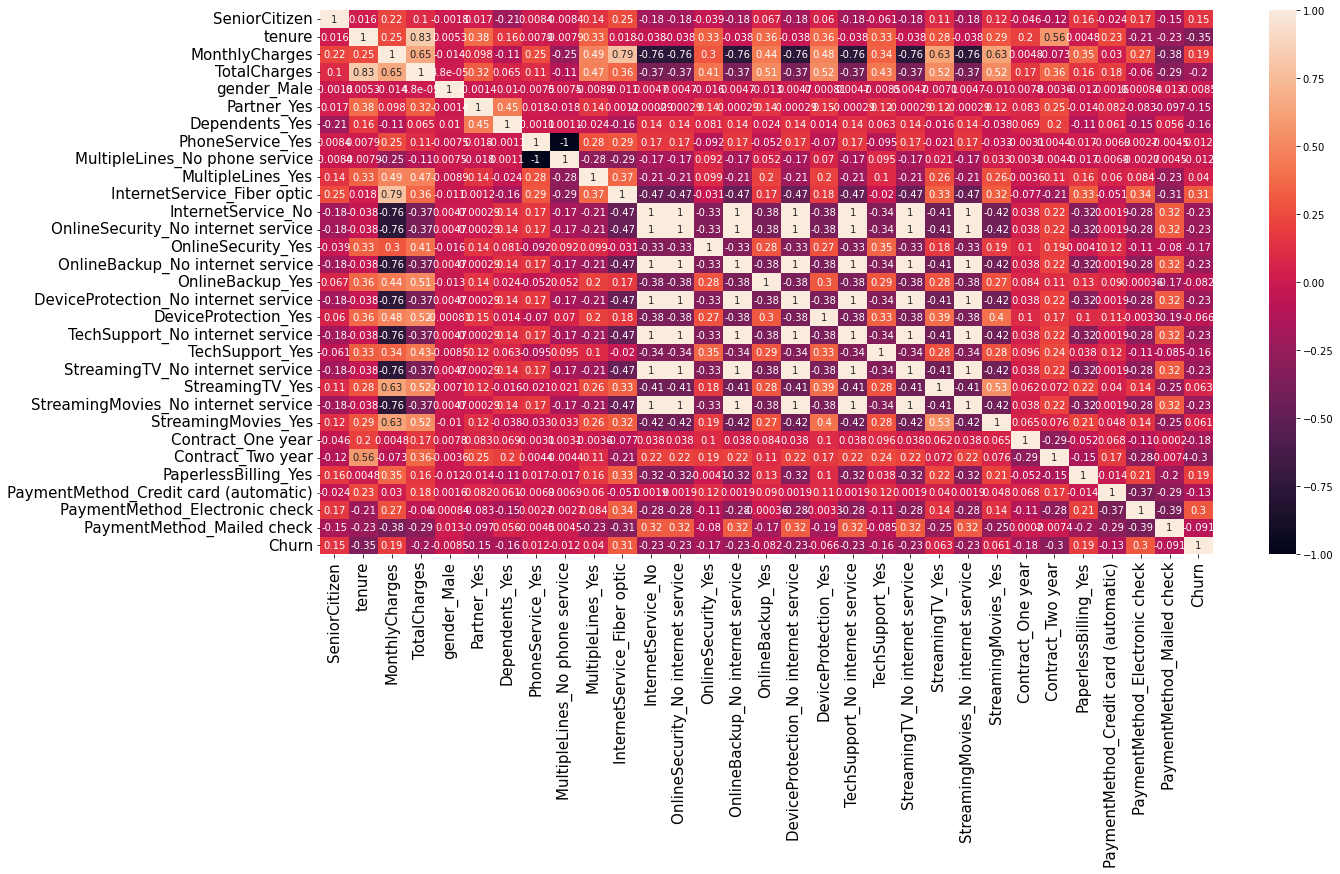

In [63]:
corr = df_new.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(20,10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<AxesSubplot:>

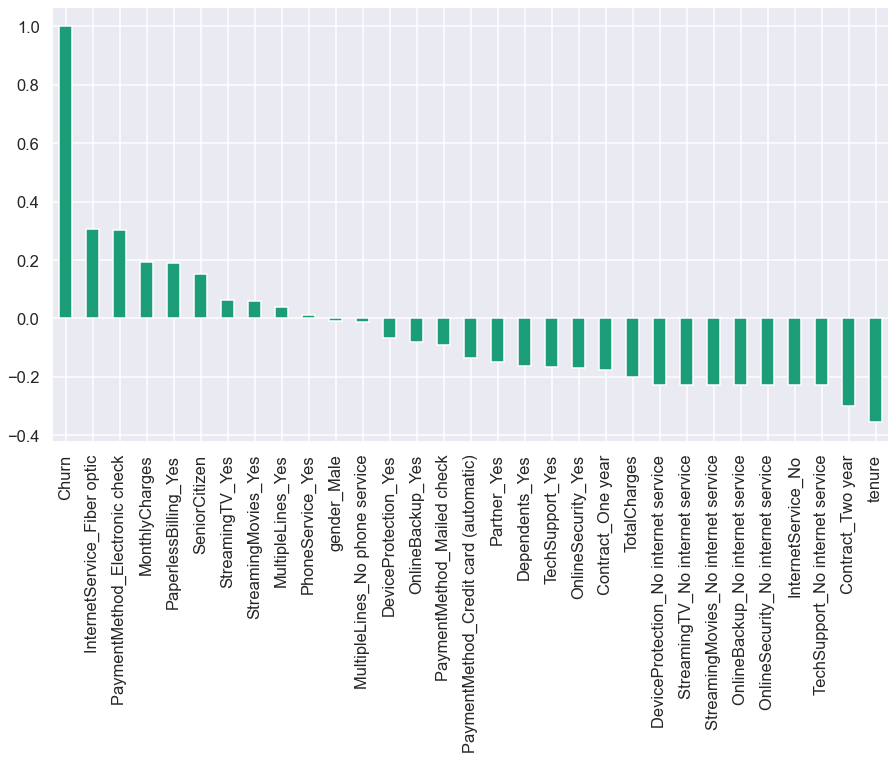

In [64]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_new.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Checking Outliers

<AxesSubplot:>

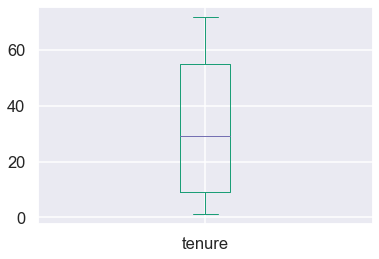

In [65]:
df_new['tenure'].plot.box()

<AxesSubplot:>

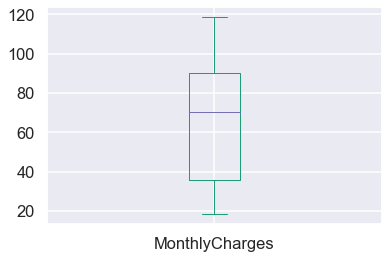

In [66]:
df_new['MonthlyCharges'].plot.box()


<AxesSubplot:>

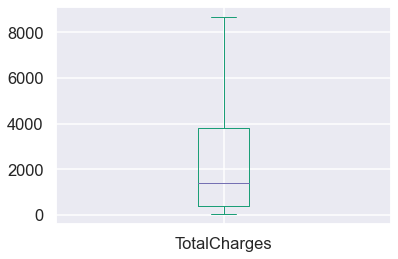

In [67]:
df_new['TotalCharges'].plot.box()

Here we can see our contineous columns not having any outliers.

### Checking Skewness

Here we will check skewness only for contineous data, not for categorical data.

In [68]:
df.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

SeniorCitizen and TotalCharges are having skewness

### Removing Skewness from the data

In [69]:
df_new['TotalCharges'] = np.sqrt( df_new['TotalCharges'] )

### Scaling the data Using StandardScaler.

In [70]:
# Dividing into Feature and Target data
x=df_new.drop(['Churn'],axis=1)
y=df_new['Churn']

In [71]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Churn', ylabel='count'>

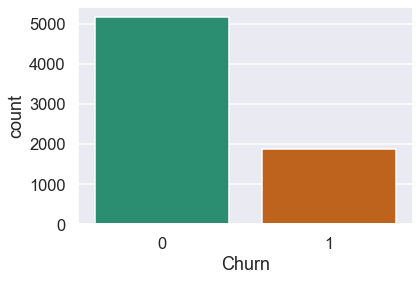

In [72]:
sns.countplot(y)

Here we can see our output is not balanced we will now use SMOTE to balance the output.

from imblearn.over_sampling import SMOTE

### Splitting data into feature and label

In [73]:
x=df_new.drop('Churn',axis=1)
y=df_new['Churn']

In [75]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

In [76]:
x_train.shape,x_test.shape


((4922, 30), (2110, 30))

### Linear Regression Algorithm

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [78]:
lr=LinearRegression()

In [79]:
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
pred=lr.predict(x_test)

In [81]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 0.13140388667224515
mean absolute error 0.2798019896407183
r2 score -1.2828624400964381


In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
score=cross_val_score(lr,x,y,cv=5)

In [84]:
print(score)
print(score.mean())
print(score.std())

[0.32530249 0.30019823 0.28543535 0.28616447 0.30092563]
0.2996052359728653
0.01444910858598241


### Ridge

In [85]:
from sklearn.linear_model import Ridge

In [86]:
rd=Ridge()

In [87]:
rd.fit(x_train,y_train)

Ridge()

In [88]:
rd.fit(x_train,y_train)

Ridge()

In [89]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 0.13140388667224515
mean absolute error 0.2798019896407183
r2 score -1.2828624400964381


In [90]:
score=cross_val_score(rd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.32522267 0.30009059 0.28541507 0.28631477 0.301251  ]
0.2996588203459266
0.014402640067849203


### Lasso

In [91]:
# let's import lasso from library
from sklearn.linear_model import Lasso

In [92]:
ls=Lasso()

In [93]:
ls.fit(x_train,y_train)

Lasso()

In [94]:
pred=ls.predict(x_test)

In [95]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.15479673867406998
mean_absolute_error 0.3353465680681461
r2_score 0.1890737251359914


In [96]:
score=cross_val_score(ls,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.19197917 0.19851945 0.18214821 0.1850094  0.19103032]
0.1897373109626685
0.005723134884152195


In [97]:
from sklearn.linear_model import ElasticNet

In [98]:
en=ElasticNet()

In [99]:
en.fit(x_train,y_train)

ElasticNet()

In [100]:
pred=en.predict(x_test)

In [101]:
print('mean_squared_error',mean_squared_error(pred,y_test))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.147196818432399
mean_absolute_error 0.31809695463530896
r2_score 0.22888706399333103


In [102]:
score=cross_val_score(en,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.23183363 0.23650477 0.21786928 0.22147877 0.23245097]
0.2280274837594724
0.007099197470451485


### Support vector machine

In [103]:
from sklearn.svm import SVR

In [104]:
svr=SVR()

In [105]:
svr.fit(x_train,y_train)

SVR()

In [106]:
pred=svr.predict(x_test)

In [107]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.14825505812302198
mean_absolute_error 0.25564581958604327
r2_score 0.2233433143150062


In [108]:
score=cross_val_score(svr,x,y,cv=5)

In [109]:
print(score)
print(score.mean())
print(score.std())

[0.23098524 0.16435719 0.17193415 0.2036446  0.21390139]
0.19696451580850985
0.025213678413559308


### Decision Tree Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor


In [111]:
dtr=DecisionTreeRegressor()

In [112]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [113]:
pred=dtr.predict(x_test)

In [114]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.27865982095839914
mean_absolute_error 0.2796998420221169
r2_score -0.4598018827764807


In [115]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.40798006 -0.36330266 -0.42380956 -0.37704061 -0.36085391]
-0.38659736206977297
0.025054609857581144


### RandomForest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rf=RandomForestRegressor()

In [118]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [119]:
pred=rf.predict(x_test)

In [120]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))  
print('r2 score',r2_score(pred,y_test))

mean_squared_error 0.14761309264630415
mean_absolute_error 0.2784455709772061
r2 score -1.0668856174012444


In [121]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.3638732  -0.411481   -0.41278652 -0.37344625 -0.33921648]
-0.38016068954634175
0.02839788904432193


### Hyperparameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
model=RandomForestRegressor()


In [124]:
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}

In [125]:
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)